<a href="https://colab.research.google.com/github/laurisolivares-dev/ai-job-market-analysis/blob/main/notebooks/AI_Job_Market_Salary_Analysis_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###AI Job Market & Salary Analysis 2025

This project explores the Artificial Intelligence job market in 2025, focusing on salary trends, skills demand, experience levels, and geographic hiring patterns. It is an Exploratory Data Analysis (EDA) project — combining data cleaning, transformation, and visual storytelling to derive actionable insights from real-world job postings.

It is my second data project. While the first introduced me to foundational EDA, this one deepens my skills in structuring an end-to-end analysis using Pandas, visual tools, and public datasets. My goal is to keep growing toward a future role as a Data Engineer.


###Objectives

**Dataset**: AI job postings from Kaggle (2025)

**Time coverage**: Up to April 2025 — providing a fresh and current view of the job market

**Geographic coverage**: Global — with listings from numerous countries

This scope helps us answer questions such as:

* What are the most requested AI skills?
* What roles are companies hiring for by experience level?
* How do salaries vary by country or seniority?


###Project Scope

**Dataset**: AI job postings from Kaggle (2025)

**Time coverage**: Up to April 2025 — providing a fresh and current view of the job market

**Geographic coverage**: Global — with listings from numerous countries

This scope helps us answer questions such as:

* What are the most requested AI skills?
* What roles are companies hiring for by experience level?
* How do salaries vary by country or seniority?

This scope allows us to identify what employers are currently seeking in AI professionals and how trends vary over time, region, and role.


###Why This Matters
In today’s data-drive
n world, the ability to work with datasets like this — cleaning, transforming, analyzing, and visualizing — is essential for **Data Engineers** and **Data Analysts**.  
This project showcases not just technical skills, but also the power of combining multiple tools to extract meaningful insights from raw data.

**Dataset Source**: [Kaggle - AI Job Market & Salary Analysis 2025](https://www.kaggle.com/datasets/)

In [1]:
# ==================================== #
# AI Job Market & Salary Analysis 2025 #
# ==================================== #

#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import os
import seaborn as sns
from IPython.display import display, HTML
from collections import Counter
from pathlib import Path


#URL of my CSV on GitHub
url = "https://raw.githubusercontent.com/laurisolivares-dev/ai-job-market-analysis/main/files/ai_job_dataset.csv"

#Load of dataset
df = pd.read_csv(url)

#Show columns and rows
print(f"Shape:{df.shape}")
df.head()

#Converting date columns
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
df['application_deadline'] = pd.to_datetime(df['application_deadline'], errors='coerce')

df.info()


Shape:(15000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15000 non-null  object        
 1   job_title               15000 non-null  object        
 2   salary_usd              15000 non-null  int64         
 3   salary_currency         15000 non-null  object        
 4   salary_local            15000 non-null  int64         
 5   experience_level        15000 non-null  object        
 6   employment_type         15000 non-null  object        
 7   company_location        15000 non-null  object        
 8   company_size            15000 non-null  object        
 9   employee_residence      15000 non-null  object        
 10  remote_ratio            15000 non-null  int64         
 11  required_skills         15000 non-null  object        
 12  education_required      1500

In [ ]:
#Count null values
missing_values = df.isnull().sum()
total_missing = missing_values.sum()
display(HTML("<h4>🔍 Check for Missing Values</h4>"))

#Show Resume
if total_missing > 0:
    display(HTML(f"<p style='color:red'><b>⚠️ Total missing values in dataset:</b> {total_missing}</p>"))
    #Show table with columns that have null values
    display(missing_values[missing_values > 0].to_frame('Missing Count').style.set_caption("Columns with Missing Values"))
else:
    display(HTML("<p style='color:green'><b>✅ No missing values found.</b></p>"))

In [2]:
#Create file and output
os.makedirs("outputs", exist_ok=True)
os.makedirs("files", exist_ok=True)

In [3]:
#Check duplicated
num_duplicates = df.duplicated().sum()

#Show with HTML
display(HTML(f"<h4>🧹 Check for Duplicates</h4><p><b>Total duplicated rows:</b> {num_duplicates}</p>"))
if num_duplicates > 0:
    display(HTML(f"<p style='color:red'><b>⚠️ Warning:</b> There are {num_duplicates} duplicated rows in the dataset.</p>"))
else:
    display(HTML("<p style='color:green'><b>✅ No duplicated rows found.</b></p>"))


###Data Cleaning & Transformation

In this step, I will:

- Check and clean missing and duplicate values.
- Standardize categorical columns for better readability:
  - `experience_level`
  - `employment_type`
  - `company_size`
- Prepare the `required_skills` column for skill-based analysis.

This transformation process is essential to ensure the dataset is clean, structured, and ready for accurate and meaningful analysis.

In [4]:
#Standardize experience_level
#Show with HTML
display(HTML("<h4>📌 Standardizen: <code>experience_level</code></h4>"))
df['experience_level'] = df['experience_level'].replace({
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior-level',
    'EX': 'Executive'
})

df['experience_level'].value_counts()

,count
experience_level,
Executive,3843
Mid-level,3764
Senior-level,3741
Entry-level,3652


In [5]:
# Standardize employment_type
df['employment_type'] = df['employment_type'].replace({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

#show header with style
display(HTML("<h4>📌 Standardize: <code>employment_type</code></h4>"))

#Show counting results
employment_counts = df['employment_type'].value_counts().to_frame('Count')
display(employment_counts.style.set_caption("Distribution of Employment Types"))

,Count
employment_type,
Contract,3841
Part-time,3757
Freelance,3705
Full-time,3697


In [6]:
# Standardize company_size
df['company_size'] = df['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

#Show header with style
display(HTML("<h4>🏢 Standardize: <code>company_size</code></h4>"))

# Show counting results
company_size_counts = df['company_size'].value_counts().to_frame('Count')
display(company_size_counts.style.set_caption("Distribution of Company Sizes"))

,Count
company_size,
Large,5087
Small,4975
Medium,4938


In [7]:
#Prepare the required_skills
df['required_skills'] = df['required_skills'].str.split(', ')


In [8]:
#Flatten the required_skills column (convert lists into a single list)
all_skills = df['required_skills'].explode()

#Count the frequency of each skill
skill_counts = Counter(all_skills)

#Get the Top 10 most frequent skills
top_10_skills = skill_counts.most_common(10)

# Create a DataFrame from the top 10 skills
top_skills_df = pd.DataFrame(top_10_skills, columns=["Skill", "Count"])

# Save as CSV in the files folder
top_skills_df.to_csv("files/top_10_skills.csv", index=False)

# Display to verify
top_skills_df

# Display table in HTML form
display(HTML(
    top_skills_df.style
        .set_caption("🔝 Top 10 Most In-Demand AI Skills (2025)")
        .format({"Count": "{:,}"})
        .set_table_styles([
            {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', '#333')]},
            {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('color', '#000')]},
            {'selector': 'td', 'props': [('font-size', '14px')]}
        ])
        .to_html()
))


,Skill,Count
0,Python,"4,499"
1,SQL,"3,511"
2,TensorFlow,"3,096"
3,Kubernetes,"3,078"
4,PyTorch,"2,831"
5,Scala,"2,748"
6,Linux,"2,642"
7,Java,"2,531"
8,Git,"2,491"
9,GCP,"2,460"


###Visualization: Top 10 Most In-Demand AI Skills

After exploring the required skills from the dataset, it's time to take a closer look at the **Top 10 most frequently mentioned**.

We’ll use a bar chart built with **`matplotlib`** to visualize the frequency of these skills.  
This will help us clearly identify which technical competencies are most in demand in the AI job market for 2025, and give us a better sense of the technologies that companies are actively hiring for.


In [9]:
#Create outputs folder if it doesn't exist
os.makedirs("files", exist_ok=True)
#Reseparate names and values from the top 10
skills, counts = zip(*top_10_skills)

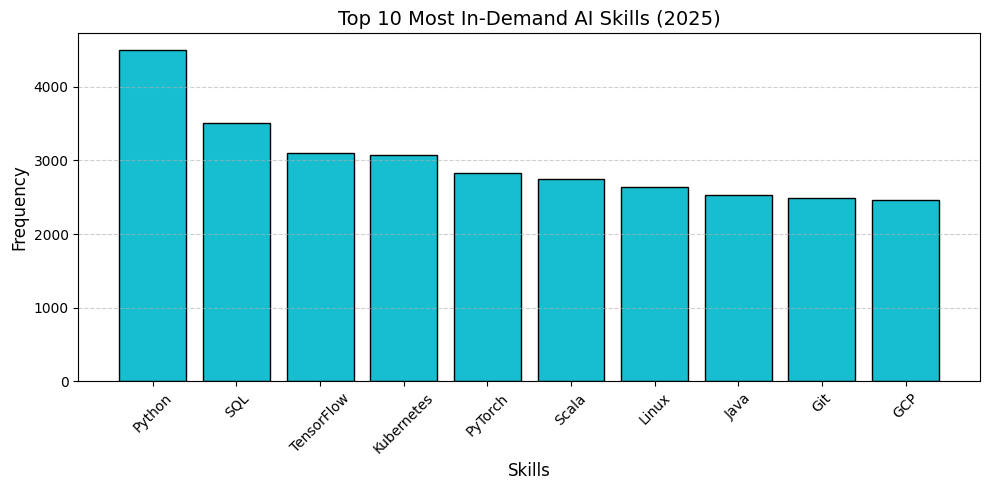

In [10]:
# Save the bar chart as PNG
plt.figure(figsize=(10,5))
plt.bar(skills, counts, color='#17becf', edgecolor='black')
plt.title("Top 10 Most In-Demand AI Skills (2025)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

#Save the image in the outputs folder
plt.savefig("outputs/top_10_ai_skills.png", dpi=1024)

plt.show()

###My Progress vs. Top AI Skills (2025)

The following table shows how my current skills align with the Top 10 most in-demand AI technologies identified in this project:

| Rank | Skill       | Demand Count | My Skill Level     |
|------|-------------|---------------|---------------------|
| 1    | Python      | 4,499         | ✅ Advanced         |
| 2    | SQL         | 3,511         | ✅ Intermediate     |
| 3    | TensorFlow  | 3,096         | ❌ Not started yet  |
| 4    | Kubernetes  | 3,078         | 🟡 Learning         |
| 5    | PyTorch     | 2,831         | ❌ Not started yet  |
| 6    | Scala       | 2,748         | ❌ Not started yet  |
| 7    | Linux       | 2,642         | ✅ Advanced         |
| 8    | Java        | 2,531         | ❌ Not started yet  |
| 9    | Git         | 2,491         | ✅ Comfortable      |
| 10   | GCP         | 2,460         | ✅ Course completed |

###Distribution of AI Jobs by Country and Experience Level

This section analyzes the number of AI job openings by country, broken down by experience level. It helps us understand which countries offer the most opportunities and whether they are targeting junior, mid-level, or senior professionals.

This analysis is especially useful for identifying both entry-level and advanced roles across different regions.


In [11]:
# Group by country and experience level
jobs_by_country_exp = df.groupby(['company_location', 'experience_level']).size().reset_index(name='Job Count')

# Filter the 5 countries with the most total offers
top_countries = df['company_location'].value_counts().head(5).index

# Filter the dataframe for those countries
filtered = jobs_by_country_exp[jobs_by_country_exp['company_location'].isin(top_countries)]

# Remove the index
filtered = filtered.reset_index(drop=True)

# Display styled table with 'company_location' and 'experience_level' as index
filtered_display = filtered.copy()
filtered_display.columns = ['Company Location', 'Experience Level', 'Job Count']

filtered_display.set_index(['Company Location', 'Experience Level','Job Count']).style \
    .set_caption("🔝 Top 5 COUNTRIES by Experience Level in AI Job Postings") \
    .format({"Job Count": "{:,}"}) \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', '#333'), ('font-size', '16px'), ('font-weight', 'bold')]
    }])

###AI Job Openings by Country and Experience Level

This clustered bar chart shows the distribution of AI job opportunities by **country** and **experience level** in the 5 countries with the most vacancies.

By visualizing this data, we can better understand:

- Which countries are leading in AI hiring.
- Whether they focus on junior, intermediate, or senior professionals.
- How the demand for talent varies by region.

This type of analysis is especially useful for job seekers and data professionals (myself included) who want to identify where their skills are most needed.


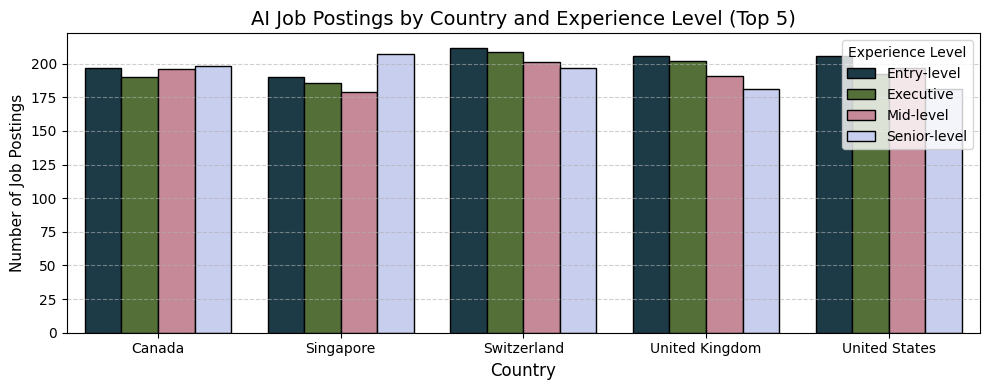

In [12]:
#Create copy to work with pretty names
df_plot = filtered.copy()
df_plot.columns = ['Company Location', 'Experience Level', 'Job Count']

#Configure the chart
plt.figure(figsize=(10, 4))
sns.barplot(
    data=df_plot,
    x='Company Location',
    y='Job Count',
    hue='Experience Level',
    palette='cubehelix',
    edgecolor='black'
)

#Titles and format
plt.title('AI Job Postings by Country and Experience Level (Top 5)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=11)
plt.legend(title='Experience Level')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

#Save the image
plt.savefig('outputs/ai_jobs_by_country_exp.png', dpi=1024)

#Show
plt.show()

###Recruiter Expectations by Experience Level

Based on the data, here are typical expectations for each experience level:

- **Entry-Level**: Candidates are expected to show foundational knowledge, adaptability, and willingness to learn. Recruiters may look for generalist skills and curiosity.

- **Mid-Level**: Recruiters expect applied experience, familiarity with tools, and the ability to work independently. Emphasis on collaboration and real-world project exposure.

- **Senior-Level**: Strategic thinking, system design, and leadership over full pipelines or AI projects. Recruiters seek strong portfolios, mentoring ability, and decision-making skills.

- **Executive**: Business acumen, cross-functional leadership, and the ability to align AI initiatives with company goals. Less about coding, more about vision and impact.

These expectations also vary by country: for example, **Germany** tends to value certifications more, while **US** jobs emphasize project portfolios and results.

In [13]:
#Check the Salary column
df.columns

#Visualize the salary distribution
df['salary_usd'].describe()

#Calculate percentiles
p25 = df['salary_usd'].quantile(0.25)
p75 = df['salary_usd'].quantile(0.75)

#Function to categorize
def categorize_salary(salary):
    if salary < p25:
        return 'Low'
    elif salary > p75:
        return 'High'
    else:
        return 'Moderate'

#Create a new column
df['salary_range'] = df['salary_usd'].apply(categorize_salary)

In [14]:
#Create crosstab
salary_by_experience = df.groupby(['experience_level', 'salary_range']).size().unstack().fillna(0).astype(int)

#Display table with style
salary_by_experience.style \
    .set_caption("📊 AI Job Count by Experience Level and Salary Range") \
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', '#333'), ('font-size', '16px'), ('font-weight', 'bold')]},
        {'selector': 'th',
         'props': [('font-weight', 'bold'), ('background-color', '#f2f2f2')]}
    ]) \
    .format("{:,}")

salary_range,High,Low,Moderate
experience_level,,,
Entry-level,0,"2,472","1,180"
Executive,"2,964",137,742
Mid-level,47,794,"2,923"
Senior-level,739,347,"2,655"


### AI Job Count by Experience Level and Salary Range

This clustered bar chart shows the distribution of AI job openings by **experience level** and categorized **salary range** (`Low`, `Moderate`, `High`).

To avoid the sensitivity around exact salaries, this analysis groups them by dataset percentiles:
- **Low**: bottom 25% (below P25)  
- **Moderate**: middle 50% (P25–P75)  
- **High**: top 25% (above P75)

**What are percentiles?**  
Percentiles indicate the position of a value within an ordered dataset.  
- **P25 (25th percentile):** 25% of values are **below** this number (and 75% above).  
- **P50 (median):** 50% of values are below and 50% above.  
- **P75 (75th percentile):** 75% of values are below this number (top 25% above).

### Real-World Salary Interpretation

- **Low**  
  - *Dataset:* less than **$80,000**  
  - *Typical offers:* **$55,000–$70,000**  
  - *Common for:* Entry-level / Junior roles

- **Moderate**  
  - *Dataset:* **$80,000–$130,000**  
  - *Typical offers:* **$90,000–$120,000**  
  - *Common for:* Mid-level professionals

- **High**  
  - *Dataset:* more than **$130,000**  
  - *Typical offers:* **$140,000–$200,000+**  
  - *Common for:* Senior / Executive positions

> These ranges may vary by location, company size, and remote status, but they provide a grounded reference for 2025 compensation expectations.

### Key Insights

- Entry-level roles are mostly concentrated in the **Moderate** range, with very few in **High**.  
- Senior and Executive roles appear more frequently in the **High** salary range.  
- Mid-level roles are more evenly distributed across all categories.

This categorization offers a **fair and anonymized** view of compensation across career stages — useful for both job seekers and recruiters.

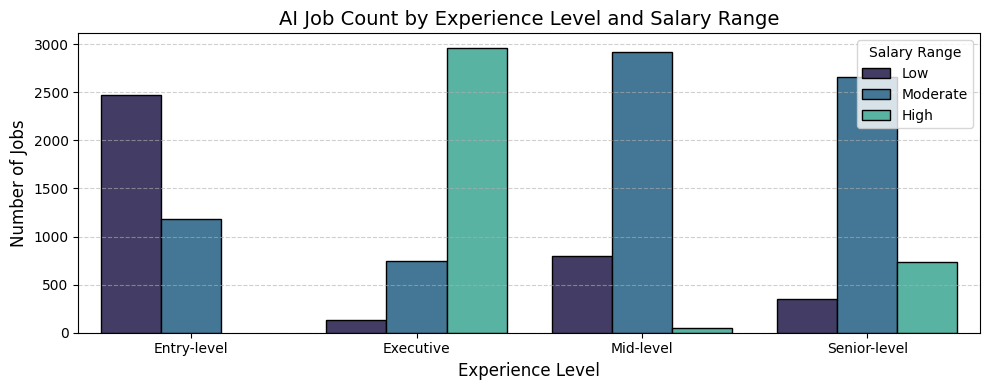

In [15]:
# Prepare data for chart
df_plot = df.groupby(['experience_level', 'salary_range']).size().reset_index(name='Job Count')

# Configure chart
plt.figure(figsize=(10,4))
sns.barplot(
    data=df_plot,
    x='experience_level',
    y='Job Count',
    hue='salary_range',
    palette='mako',
    edgecolor='black'
)

#Titles and labels
plt.title('AI Job Count by Experience Level and Salary Range', fontsize=14)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.legend(title='Salary Range')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Guardar imagen
plt.savefig('outputs/ai_salary_range_by_experience.png', dpi=1024)

# Mostrar
plt.show()

In [16]:
# Group by country and salary_range
salary_by_country = df.groupby(['company_location', 'salary_range']).size().reset_index(name='Job Count')

# Top 5 countries with most AI jobs
top_5_countries = df['company_location'].value_counts().head(5).index

# Filter salary data for top countries
filtered_salary_by_country = salary_by_country[salary_by_country['company_location'].isin(top_5_countries)]

#Rename columns for clearer display
filtered_salary_by_country_display = filtered_salary_by_country.rename(columns={
    'company_location': 'Country',
    'salary_range': 'Salary Range',
    'Job Count': 'Job Count'
})

#Display table with style
filtered_salary_by_country_display.style \
    .set_caption("🌍 AI Job Count by Salary Range in Top 5 Countries") \
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', '#333'), ('font-size', '16px'), ('font-weight', 'bold')]},
        {'selector': 'th',
         'props': [('font-weight', 'bold'), ('background-color', '#f2f2f2')]}
    ]) \
    .format({"Job Count": "{:,}"})  #Applies only to numeric column

,Country,Salary Range,Job Count
6,Canada,High,153
7,Canada,Low,211
8,Canada,Moderate,417
40,Singapore,High,195
41,Singapore,Low,131
42,Singapore,Moderate,436
49,Switzerland,High,406
50,Switzerland,Low,20
51,Switzerland,Moderate,393
52,United Kingdom,High,218


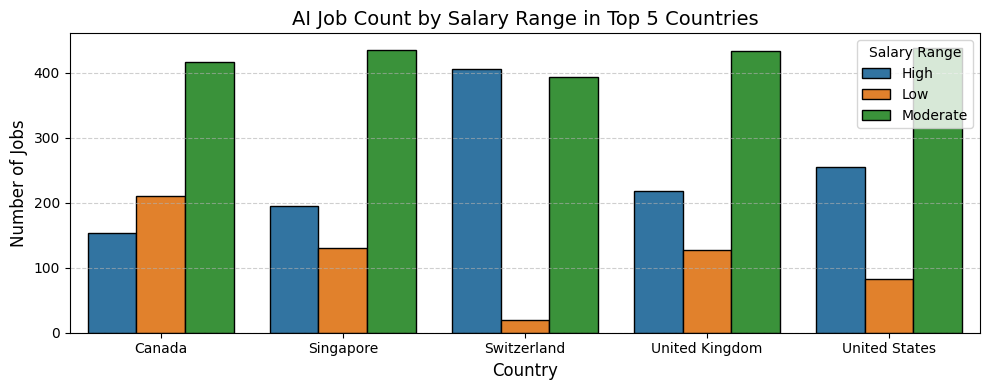

In [17]:
plt.figure(figsize=(10,4))
sns.barplot(
    data=filtered_salary_by_country,
    x='company_location',
    y='Job Count',
    hue='salary_range',
    palette='tab10',
    edgecolor='black'
)

plt.title('AI Job Count by Salary Range in Top 5 Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.legend(title='Salary Range')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('outputs/ai_salary_range_by_country.png', dpi=1024)
plt.show()


###Conclusions

By combining technical analysis with real-world salary expectations, we gain a deeper understanding of how compensation aligns with experience levels in the AI job market.

This empowers both professionals and recruiters to navigate the job landscape more confidently — and sets the stage for visualizing these trends in the chart below.


###Next, Let’s Explore Geographic Trends

Now that we’ve examined how salaries align with experience levels, it’s time to explore **how these trends vary across countries**.

As someone navigating professional transitions across borders, I understand how important it is to know **where the opportunities truly are**.

Which regions offer the most openings? Are high-paying roles concentrated in specific locations?

Let’s dive into the geographic breakdown of AI job listings.

###AI Job Opportunities by Country and Salary Range

To complete this analysis, we’ll explore how AI job opportunities are distributed across the top 5 countries by employment volume, segmented by salary range (Low, Moderate, High).

This perspective helps answer key questions:

Which countries offer the highest-paying jobs?

Are there regions dominated by lower or moderate salaries?

How does compensation vary internationally?

For professionals like myself — especially those of us reinventing our careers and looking toward a future shaped by AI — this geographic perspective is essential for making informed decisions and targeting the right opportunities.

💡 By combining experience level, skills demand, and now salary by country, we gain a deeper, more complete understanding of the current AI job market landscape.

In [18]:
# Group by country and salary range
country_salary = df.groupby(['company_location', 'salary_range']).size().reset_index(name='Job Count')

# Get top 5 countries with most jobs
top_5_countries = df['company_location'].value_counts().head(5).index

# Filter only those countries
filtered_country_salary = country_salary[country_salary['company_location'].isin(top_5_countries)]

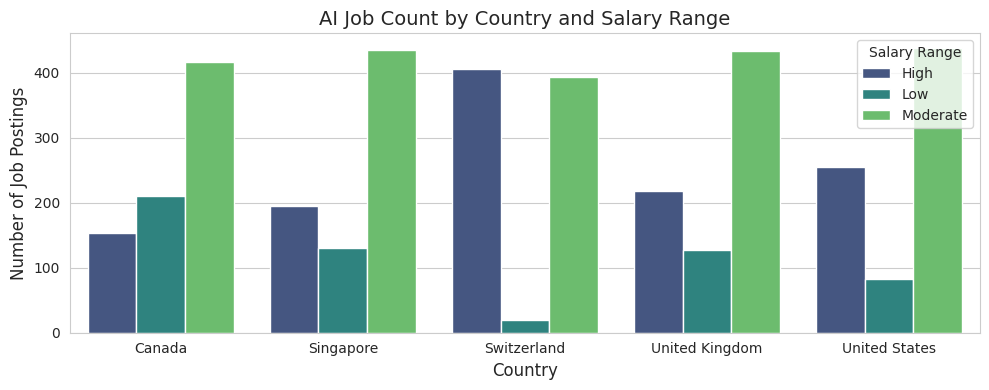

In [ ]:
# Set seaborn style
sns.set_style('whitegrid')
plt.figure(figsize=(10,4))

# Create barplot
sns.barplot(
    data=filtered_country_salary,
    x='company_location',
    y='Job Count',
    hue='salary_range',
    palette='viridis'
)

# Titles and labels
plt.title('AI Job Count by Country and Salary Range', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.legend(title='Salary Range')

# Save plot
plt.tight_layout()
plt.savefig("outputs/ai_jobs_by_country_and_salary.png", dpi=1024)
plt.show()

In [22]:
##Create `requirements.txt`
content = """pandas>=2.0
numpy>=1.24
matplotlib>=3.7
seaborn>=0.12
ipython>=8.0
"""

with open("files/requirements.txt", "w", encoding="utf-8") as f:
    f.write(content)

#Show header with style
display(HTML("<h4>✅ Requirements:</h4>"))
print(Path("files/requirements.txt").read_text())

pandas>=2.0
numpy>=1.24
matplotlib>=3.7
seaborn>=0.12
ipython>=8.0

